In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyRegressor
from statsmodels.graphics.regressionplots import abline_plot

%matplotlib inline

In [4]:
df = pd.read_csv('data/kc_house_data.csv')
df.date = pd.to_datetime(df.date)
df.waterfront = df.waterfront.fillna(value = 0)
df = df.drop(columns = ['view','lat', 'long', 'sqft_basement'])
#df.yr_renovated.fillna(value = 0, inplace = True) 
df['yard'] = df.sqft_lot - df.sqft_living
df['ratio_15'] = df.sqft_living/df.sqft_living15
df['years_old'] = 2020 - df.yr_built
s = pd.get_dummies(df.condition, drop_first = True)
df = pd.concat([df, s], axis = 1)
#df = df.drop(columns = ['condition'])
df.head()
y = df.price
X = df.drop(columns = ['price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
yard             21597 non-null int64
ratio_15         21597 non-null float64
years_old        21597 non-null int64
2                21597 non-null uint8
3                21597 non-null uint8
4                21597 non-null ui

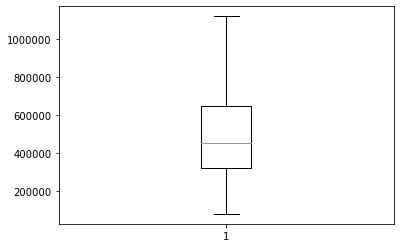

In [80]:
fig, ax = plt.subplots()
ax = plt.boxplot(df.price, showfliers = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,sqft_living15,sqft_lot15,yard,ratio_15,years_old,2,3,4,5
12764,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0.0,3,...,98053,4850,217800,294212,2.791753,21,0,1,0,0
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0.0,4,...,98102,3940,8800,15550,3.058376,110,0,0,1,0
3910,9808700762,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,1.0,3,...,98004,3930,25449,27285,2.554707,80,0,1,0,0
9245,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,0.0,3,...,98039,4540,42730,21484,2.178414,19,0,1,0,0
8085,1924059029,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,1.0,3,...,98040,3270,10454,3428,2.948012,37,0,1,0,0
4407,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0.0,3,...,98039,3560,24345,25869,2.584270,19,0,1,0,0
14542,2303900035,2014-06-11,2890000.0,5,6.25,8670,64033,2.0,0.0,3,...,98177,4140,81021,55363,2.094203,55,0,1,0,0
18288,6072800246,2014-07-02,3300000.0,5,6.25,8020,21738,2.0,0.0,3,...,98006,4160,18969,13718,1.927885,19,0,1,0,0
1162,1247600105,2014-10-20,5110000.0,5,5.25,8010,45517,2.0,1.0,3,...,98033,3430,26788,37507,2.335277,21,0,1,0,0
1446,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0.0,3,...,98004,4600,21750,15985,1.739130,11,0,1,0,0


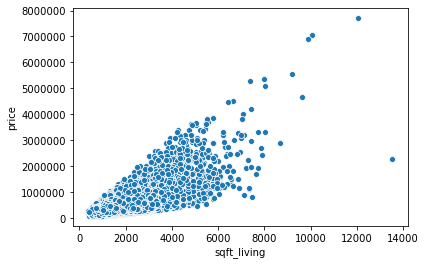

In [36]:
sorted_ = df.sort_values(by = 'sqft_living', ascending = False)
mansions = df[df['price'] > 1500000]

#df.drop(df.index[12764], inplace=True)
fig, ax = plt.subplots()
sns.scatterplot(x = df.sqft_living, y = df.price)

sorted_.head(20)

NoneType

In [6]:
df.sort_values(by = 'bedrooms', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,zipcode,sqft_living15,sqft_lot15,yard,ratio_15,years_old,2,3,4,5
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,7,...,98103,1330,4700,4380,1.218045,73,0,0,0,1
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0.0,7,...,98106,1420,4960,1960,2.112676,102,0,1,0,0
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0.0,9,...,98004,2730,10400,6330,1.681319,12,0,1,0,0
19239,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0.0,7,...,98105,1810,3745,825,1.613260,107,0,0,1,0
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0.0,7,...,98006,2040,11914,8304,1.769608,62,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12472,1172000150,2014-08-29,238000.0,1,1.00,530,6350,1.0,0.0,5,...,98103,1200,6350,5820,0.441667,79,0,0,0,1
13316,4356200120,2014-10-23,248000.0,1,1.00,790,12000,1.0,0.0,6,...,98118,1900,6000,11210,0.415789,102,0,1,0,0
7010,203100460,2014-09-24,400000.0,1,1.00,530,13679,1.0,0.0,6,...,98053,1930,20624,13149,0.274611,71,0,0,1,0
3578,1925069006,2014-12-03,355000.0,1,0.75,530,33278,1.0,0.0,4,...,98074,2830,14311,32748,0.187279,70,0,0,1,0


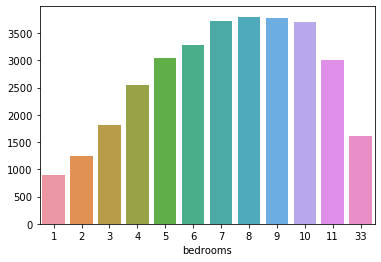

In [95]:
bedrooms_grouped = df.groupby(df['bedrooms'])['sqft_living'].mean()
bedrooms_grouped.index

sns.barplot(x = bedrooms_grouped.index, y = bedrooms_grouped.values)

11

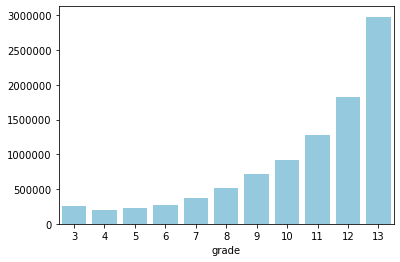

In [35]:
g_grouped = df.groupby(df['grade'])['price'].median()
g_grouped

sns.barplot(x = g_grouped.index, y = g_grouped.values, color = 'skyblue')


condition
1    270000.0
2    279000.0
3    450250.0
4    440000.0
5    526000.0
Name: price, dtype: float64

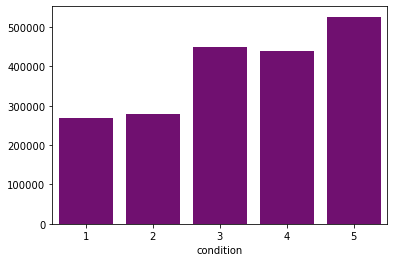

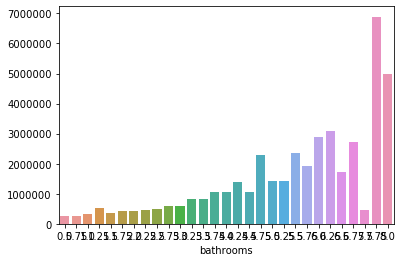

In [10]:
b_grouped = df.groupby(df['bathrooms'])['price'].median()
b_grouped


sns.barplot(x = b_grouped.index, y = b_grouped.values)

In [133]:
z_grouped = df.groupby(df['zipcode'])['price'].median()
z_grouped.sort_values(ascending = False)


#sns.barplot(x = z_grouped.index, y = z_grouped.values)

zipcode
98039    1895000.0
98004    1150000.0
98040     993750.0
98112     915000.0
98005     765475.0
           ...    
98188     264000.0
98001     260000.0
98032     249000.0
98168     235000.0
98002     235000.0
Name: price, Length: 70, dtype: float64

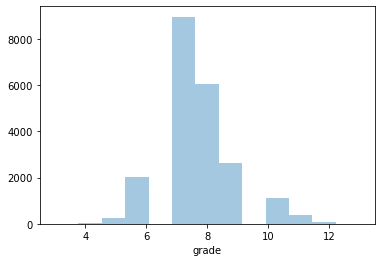

In [26]:
sns.distplot(df.grade, bins = 13, kde = False)

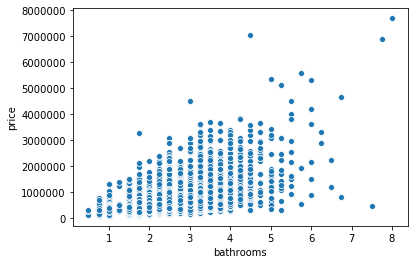

In [108]:
sns.scatterplot(x = df.bathrooms, y= df.price)

/Users/laurenphipps/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


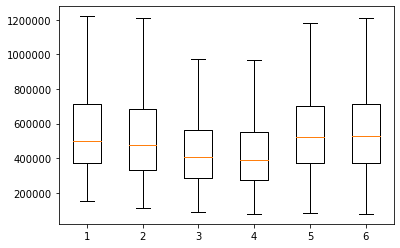

In [20]:
y_grouped = df.groupby(df['years_old'])['price'].median()
y_grouped
less20 = df.loc[(df.years_old >= 0) & (df.years_old < 20)]
less40 = df.loc[(df.years_old >= 20) & (df.years_old < 40)]
less60 = df.loc[(df.years_old >= 40) & (df.years_old < 60)]
less80 = df.loc[(df.years_old >= 60) & (df.years_old < 80)]
less100 = df.loc[(df.years_old >= 80) & (df.years_old < 100)]
less120 = df.loc[(df.years_old >= 100) & (df.years_old < 120)]

prices = [less20.price, less40.price, less60.price, less80.price, less100.price, less120.price]


fig, ax = plt.subplots()
ax.boxplot(x = prices, showfliers = False);

/Users/laurenphipps/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


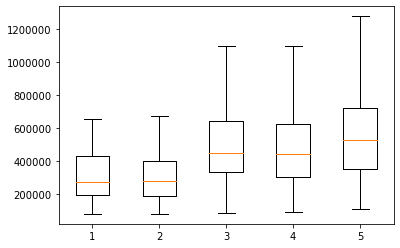

In [6]:
condition1 = df[df.condition == 1]
condition2 = df[df.condition == 2]
condition3 = df[df.condition == 3]
condition4 = df[df.condition == 4]
condition5 = df[df.condition == 5]

conditions = [condition1.price, condition2.price, condition3.price, condition4.price, condition5.price]

fig, ax = plt.subplots()
ax.boxplot(x = conditions, showfliers = False);

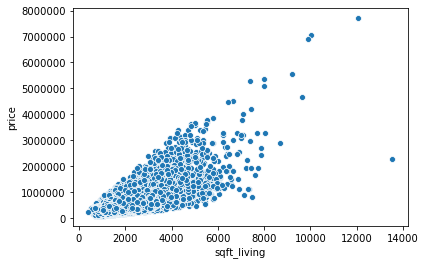

In [8]:
df_code = df[df.grade >= 6]
fig, ax = plt.subplots()
sns.scatterplot(x = df_code.sqft_living, y = df_code.price)

## With train data:

In [2]:
import datacleaning as dc
import linregvis as lrv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyRegressor
from statsmodels.graphics.regressionplots import abline_plot
%matplotlib inline
sns.set_style('darkgrid')
pd.options.display.float_format = "{:,.2f}".format
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick

In [3]:
df = dc.test_split(
    dc.get_data('data/kc_house_data.csv')
)
X_train = dc.clean_it(df[0])
X_test = dc.clean_it(df[1])
y_train = df[2]
y_test = df[3]

In [5]:
df = pd.concat([X_train, y_train], axis = 1)

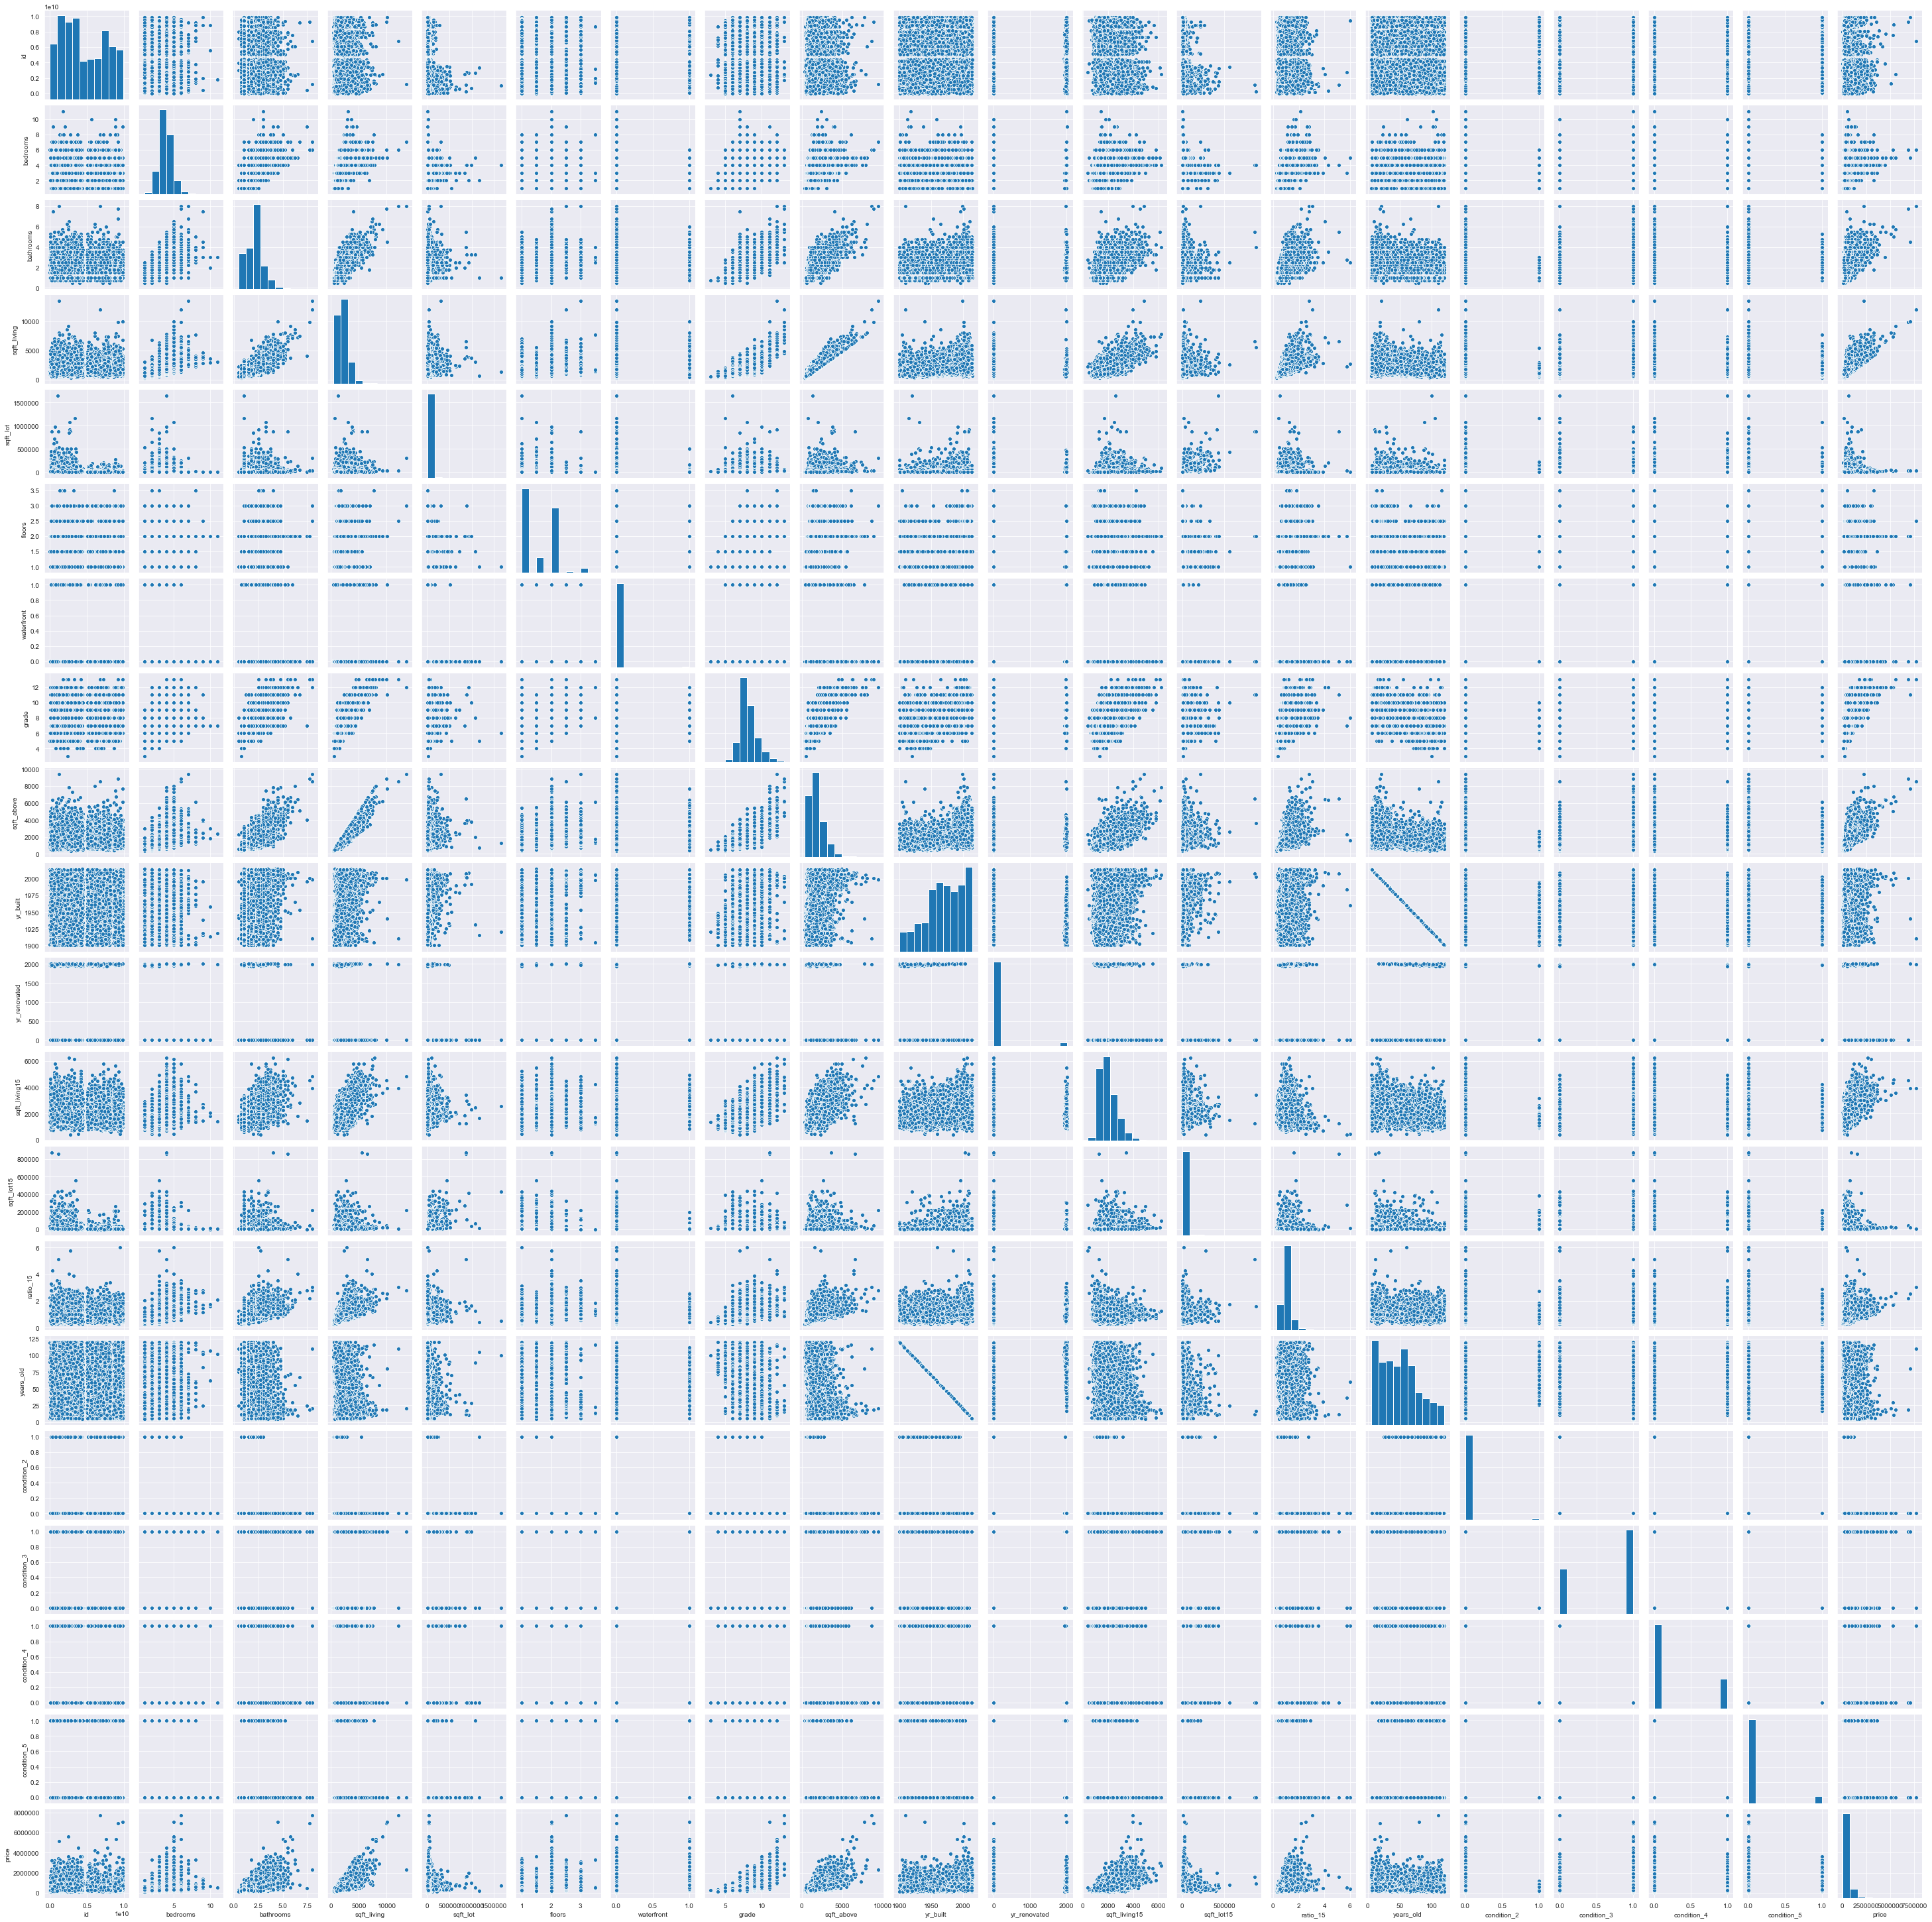

In [9]:
sns.pairplot(df, height = 2)